# EDA, Preprocessing & Vectorization

## Setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Product Reviews

In [ ]:
product_reviews = pd.read_csv('/content/drive/MyDrive/AuthentiFeel/processed_data/product_reviews.csv')

### EDA

In [ ]:
product_reviews.head()

,unique_id,asin,product_name,product_type,helpful,rating,title,date,reviewer,reviewer_location,review_text,positive_or_not
0,0785758968:one_of_the_best_crichton_novels:jos...,0785758968,Sphere: Books: Michael Crichton,books,0 of 1,5.0,One of the best Crichton novels,"July 1, 2006",Joseph M,"Colorado, USA",Sphere by Michael Crichton is an excellant nov...,1
1,0452279550:the_medicine_of_the_future:wafa_rashed,0452279550,Healing from the Heart: A Leading Surgeon Comb...,books,34 of 41,4.0,The Medicine of the Future,"November 6, 2002",Wafa Rashed,"Jabriya, KUWAIT",Dr. Oz is an accomplished heart surgeon in the...,1
2,"1599620065:beautiful!:sarah_silva_""sar""",1599620065,Mythology: DC Comics Art of Alex Ross 2007 Cal...,books,NaN,5.0,Beautiful!,"June 13, 2006","Sarah Silva ""Sar""","San Diego, CA USA",The most gorgeous artwork in comic books. Cont...,1
3,0743277724:for_lovers_of_robicheaux:g._rousseau,0743277724,Pegasus Descending: A Dave Robicheaux Novel (D...,books,1 of 1,4.0,For lovers of Robicheaux,"November 2, 2006",G. Rousseau,"Finistere, France",This book is for lovers of Robicheaux. His de...,1
4,061318114X:excellent_and_broad_survey_of_the_d...,061318114X,"Guns, Germs, and Steel: The Fates of Human Soc...",books,7 of 9,5.0,Excellent and broad survey of the development ...,"October 6, 2006","Patrick D. Goonan ""www.meaningful-life.us""","Pleasanton, CA",This is going to be a short and sweet review b...,1


In [ ]:
product_reviews.describe()

,rating,positive_or_not
count,8000.000000,8000.000000
mean,3.057250,0.500000
std,1.727598,0.500031
min,1.000000,0.000000
25%,1.000000,0.000000
50%,3.000000,0.500000
75%,5.000000,1.000000
max,5.000000,1.000000


In [ ]:
product_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   unique_id          8000 non-null   object 
 1   asin               8000 non-null   object 
 2   product_name       8000 non-null   object 
 3   product_type       8000 non-null   object 
 4   helpful            6701 non-null   object 
 5   rating             8000 non-null   float64
 6   title              8000 non-null   object 
 7   date               7999 non-null   object 
 8   reviewer           7833 non-null   object 
 9   reviewer_location  6674 non-null   object 
 10  review_text        8000 non-null   object 
 11  positive_or_not    8000 non-null   int64  
dtypes: float64(1), int64(1), object(10)
memory usage: 750.1+ KB


<ipython-input-8-d01218c2d444>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(product_reviews.corr(),annot=True)


<Axes: >

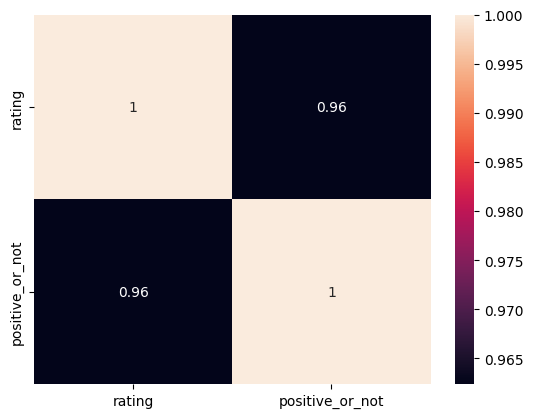

In [ ]:
sns.heatmap(product_reviews.corr(),annot=True)

<Axes: xlabel='rating', ylabel='count'>

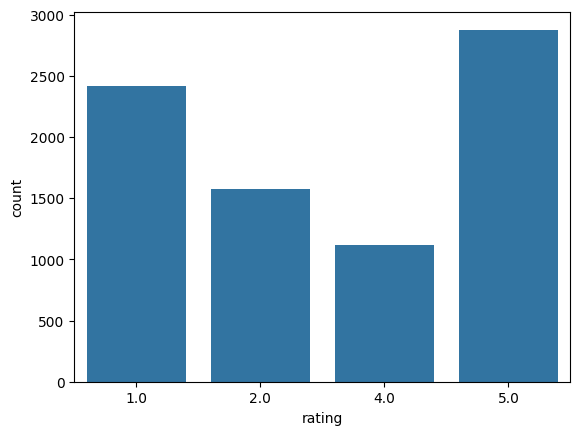

In [ ]:
sns.countplot(x='rating',data=product_reviews)

<Axes: xlabel='product_type', ylabel='count'>

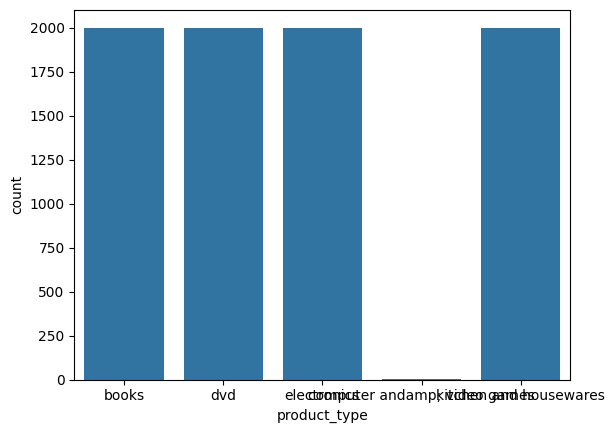

In [ ]:
sns.countplot(x='product_type',data=product_reviews)

<Axes: xlabel='positive_or_not', ylabel='count'>

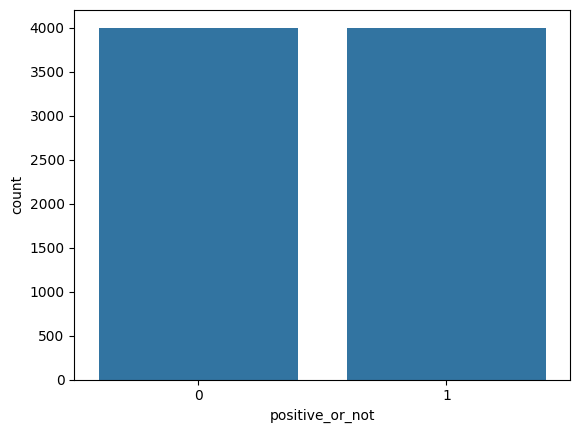

In [ ]:
sns.countplot(x='positive_or_not',data=product_reviews)

In [ ]:
product_reviews['date'] = pd.to_datetime(product_reviews['date'])

In [ ]:
product_reviews['year'] = product_reviews['date'] .dt.year

<Axes: xlabel='year', ylabel='count'>

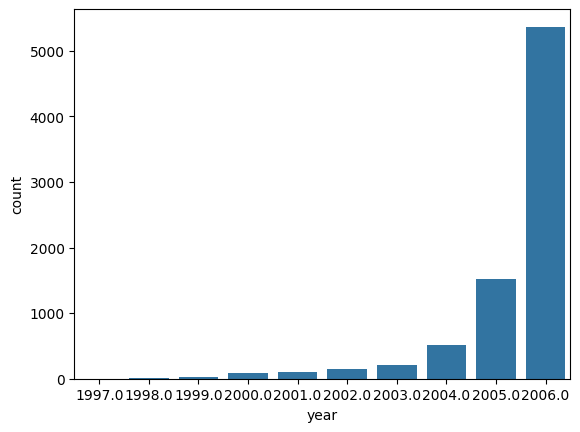

In [ ]:
sns.countplot(x='year',data=product_reviews)

In [ ]:
product_reviews['review_length'] = product_reviews['review_text'].apply(len)

<Axes: xlabel='review_length', ylabel='Count'>

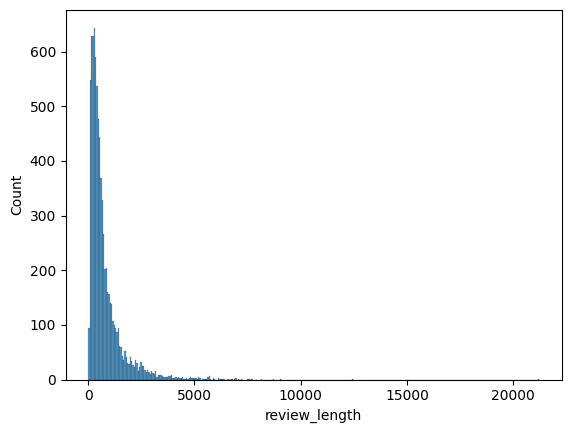

In [ ]:
sns.histplot(product_reviews['review_length'])

In [ ]:
all_words = ' '.join(product_reviews['review_text']).split(' ')
most_common_words = Counter(all_words).most_common(20)
most_common_words

[('the', 51992),
 ('and', 29493),
 ('to', 26600),
 ('a', 25990),
 ('', 24273),
 ('of', 23889),
 ('I', 21221),
 ('is', 17793),
 ('in', 13306),
 ('it', 12641),
 ('that', 11555),
 ('this', 11166),
 ('for', 10140),
 ('with', 8125),
 ('was', 7194),
 ('on', 6973),
 ('you', 6865),
 ('have', 6566),
 ('as', 6329),
 ('The', 6087)]

### Preprocessing

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
import string
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import random
from sklearn.preprocessing import normalize

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def preprocess_text(doc):
    tokens = nltk.word_tokenize(doc.lower())
    #tokens = [word for word in tokens if word not in stopwords.words('english') and word not in string.punctuation]
    # tokens = [stemmer.stem(word) for word in tokens]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

In [ ]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
data = product_reviews['review_text'].to_list()
target = product_reviews['positive_or_not'].to_list()
preprocessed_data = [preprocess_text(doc) for doc in data]

### Vectorization

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,ngram_range=(1,3),sublinear_tf=True)
#tfidf_vectorizer = TfidfVectorizer()
#tfidf_vectorizer = TfidfVectorizer(min_df=0.01,ngram_range=(1, 3))
#tfidf_vectorizer =TfidfVectorizer(ngram_range=(1, 3), max_df=0.9, min_df=3, max_features=5000, norm='l2')
tfidf_data =tfidf_vectorizer.fit_transform(preprocessed_data)
tfidf_data = normalize(tfidf_data, norm='l2', axis=1)

In [ ]:
processed_df = pd.DataFrame(tfidf_data.toarray(),columns = tfidf_vectorizer.get_feature_names_out())

In [ ]:
# processed_df['label'] = target

In [ ]:
X_train, X_test, Y_train, Y_test=train_test_split(preprocessed_data,target,random_state=42)
pipeline= Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB()),
])
parameter_grid= {
    'tfidf__max_df': (0.8, 0.9, 1.0),
    'tfidf__min_df': (0.01, 0.02, 0.03),
    'tfidf__ngram_range': ((1, 1), (1, 2), (1,3)),
    'tfidf__max_features': (None, 5000, 10000),
    'clf__alpha': (0.01, 0.1, 1),
}
grid_search= GridSearchCV(pipeline, parameter_grid, cv=5, n_jobs=-1, verbose=1)

grid_search.fit(X_train, Y_train)
print("Best hyperparameters: ", grid_search.best_params_)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best hyperparameters:  {'clf__alpha': 0.01, 'tfidf__max_df': 1.0, 'tfidf__max_features': None, 'tfidf__min_df': 0.01, 'tfidf__ngram_range': (1, 3)}


In [ ]:
grid_search.best_score_

0.8186666666666665

## Fake Reviews

In [ ]:
fake_reviews = pd.read_csv('/content/drive/MyDrive/AuthentiFeel/processed_data/fake_reviews.csv')

### EDA

In [ ]:
fake_reviews.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


In [ ]:
fake_reviews.describe()

,rating
count,40432.000000
mean,4.256579
std,1.144354
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
fake_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  object 
 1   rating    40432 non-null  float64
 2   label     40432 non-null  object 
 3   text_     40432 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


<Axes: xlabel='rating', ylabel='count'>

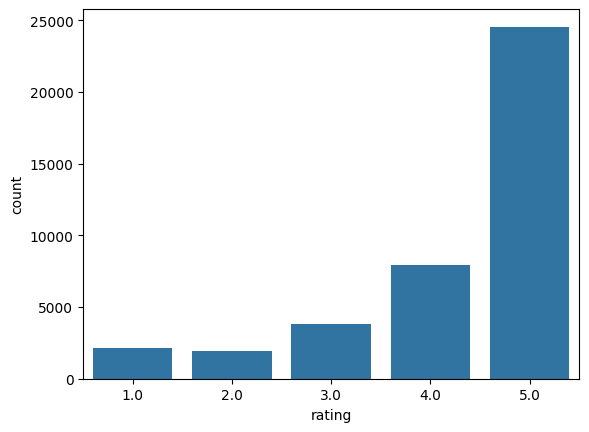

In [ ]:
sns.countplot(x='rating',data=fake_reviews)

<Axes: xlabel='label', ylabel='count'>

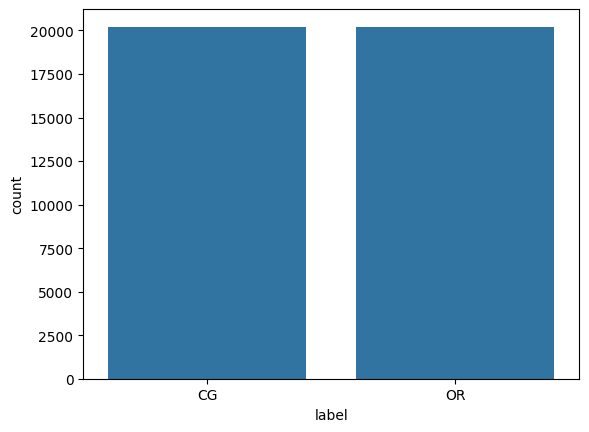

In [ ]:
sns.countplot(x='label',data=fake_reviews)

<Axes: xlabel='category', ylabel='count'>

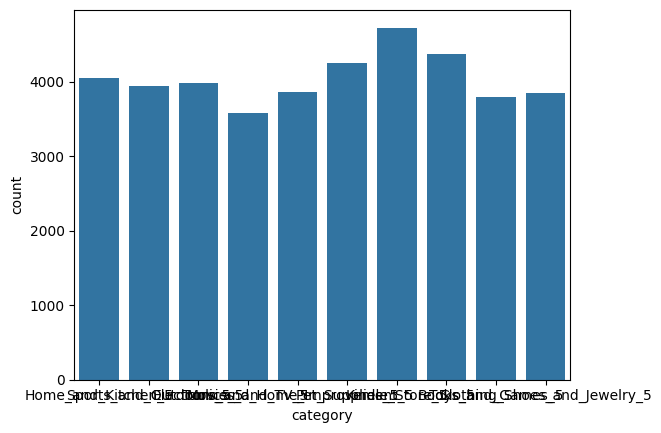

In [ ]:
sns.countplot(x='category',data=fake_reviews)

In [ ]:
fake_reviews['review_length'] = fake_reviews['text_'].apply(len)

<Axes: xlabel='review_length', ylabel='Count'>

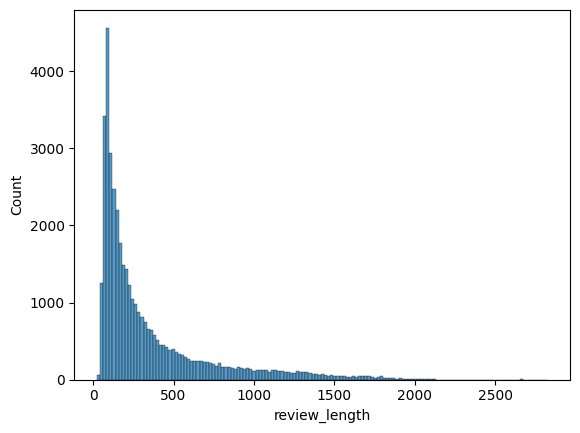

In [ ]:
sns.histplot(fake_reviews['review_length'])

In [ ]:
all_words = ' '.join(fake_reviews['text_']).split(' ')
most_common_words = Counter(all_words).most_common(20)
most_common_words

[('the', 125375),
 ('a', 94870),
 ('I', 91688),
 ('and', 86025),
 ('to', 67735),
 ('is', 63943),
 ('', 62066),
 ('it', 45646),
 ('of', 45107),
 ('for', 37686),
 ('this', 36631),
 ('in', 28095),
 ('The', 27962),
 ('was', 25895),
 ('that', 25464),
 ('with', 22811),
 ('have', 22712),
 ('my', 20354),
 ('very', 19073),
 ('are', 18901)]

### Preprocessing

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
import string
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import random
from sklearn.preprocessing import normalize

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def preprocess_text(doc):
    tokens = nltk.word_tokenize(doc.lower())
    #tokens = [word for word in tokens if word not in stopwords.words('english') and word not in string.punctuation]
    # tokens = [stemmer.stem(word) for word in tokens]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

In [ ]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
data = fake_reviews['text_'].to_list()
target = fake_reviews['label'].to_list()
preprocessed_data = [preprocess_text(doc) for doc in data]

### Vectorization

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,ngram_range=(1,3),sublinear_tf=True)
#tfidf_vectorizer = TfidfVectorizer(max_features=20000)
tfidf_data = tfidf_vectorizer.fit_transform(preprocessed_data)
tfidf_data = normalize(tfidf_data, norm='l2', axis=1)

In [ ]:
processed_df = pd.DataFrame(tfidf_data.toarray(),columns = tfidf_vectorizer.get_feature_names_out())

In [ ]:
processed_df['label'] = target

# Model Selection & Training

###**Product Reviews**

In [ ]:
%%capture
!pip install catboost
!pip install xgboost

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score, precision_score
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [ ]:
seed = 42
X_train, X_test, Y_train, Y_test=train_test_split(tfidf_data,target,random_state=seed)

In [ ]:
clf1=LogisticRegression()
clf2=KNeighborsClassifier()
clf3=DecisionTreeClassifier()
clf4=MultinomialNB()

ensemble= VotingClassifier(estimators=[('log',clf1), ('knn',clf2), ('tree',clf3), ('naive',clf4)],voting='soft')

In [ ]:
ensemble.fit(X_train,Y_train)

In [ ]:
y_train_preds = ensemble.predict(X_train)

In [ ]:
y_test_preds = ensemble.predict(X_test)

In [ ]:
ensemble.score(X_test,Y_test)

0.7335

In [ ]:
f1_score(Y_train,y_train_preds)

0.9950066577896138

In [ ]:
f1_score(Y_test,y_test_preds)

0.728476821192053

In [ ]:
names=["Logistic Regression", "KNN", "Decision Tree", "Naive Bayes", "Ensemble"]
classifiers= [clf1, clf2, clf3, clf4, ensemble]

for clf, name in zip(classifiers, names):
  scores = cross_val_predict(clf, X_train, Y_train, cv=5)
  print(f'Accuracy: {scores.mean():.3f} (+/- {scores.std():.3f}) [{name}]')

Accuracy: 0.496 (+/- 0.500) [Logistic Regression]
Accuracy: 0.542 (+/- 0.498) [KNN]
Accuracy: 0.508 (+/- 0.500) [Decision Tree]
Accuracy: 0.488 (+/- 0.500) [Naive Bayes]
Accuracy: 0.511 (+/- 0.500) [Ensemble]


In [ ]:
clf4.fit(X_train,Y_train)

MultinomialNB()

In [ ]:
y_train_pred=clf4.predict(X_train)
y_test_pred=clf4.predict(X_test)
clf4.score(X_test,Y_test)

0.872934263679765

In [ ]:
clf1.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
y_train_pred=clf1.predict(X_train)
y_test_pred=clf1.predict(X_test)
clf1.score(X_test,Y_test)

0.8535

In [ ]:
param_distributions = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 100],  # Uniform distribution over [0,4)
    'penalty': ['l2', 'l1'],  # Assuming the solver supports these penalties
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],  # Compatible with l1 penalty
    'max_iter': [100, 200, 300, 400, 500]  # Example set of iterations
}

# Define RandomizedSearchCV
random_search =RandomizedSearchCV(clf1, param_distributions, n_iter=100, cv=5, verbose=1, n_jobs=-1, random_state=42)
random_search.fit(X_train, Y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
155 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
55 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Sol

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                              100],
                                        'max_iter': [100, 200, 300, 400, 500],
                                        'penalty': ['l2', 'l1'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=42, verbose=1)

In [ ]:
random_search.best_params_

{'solver': 'newton-cg', 'penalty': 'l2', 'max_iter': 200, 'C': 100}

In [ ]:
log_reg=LogisticRegression(solver='newton-cg', max_iter=200, C=100)
log_reg.fit(X_train, Y_train)
log_reg.score(X_test, Y_test)

0.862

In [ ]:
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(Y_test,y_test_pred)
print(conf_mat)

[[4466  572]
 [ 427 4643]]


In [ ]:
ensemble= VotingClassifier(estimators=[('log',log_reg), ('naive',clf4)],voting='soft')
ensemble.fit(X_train, Y_train)

VotingClassifier(estimators=[('log',
                              LogisticRegression(C=100, max_iter=200,
                                                 solver='newton-cg')),
                             ('naive', MultinomialNB())],
                 voting='soft')

In [ ]:
y_train_pred=ensemble.predict(X_train)
y_test_pred=ensemble.predict(X_test)
ensemble.score(X_test,Y_test)

0.8695

In [ ]:
ada_clf=AdaBoostClassifier(n_estimators=200)
ada_clf.fit(X_train,Y_train)

AdaBoostClassifier(n_estimators=200)

In [ ]:
y_train_pred=ada_clf.predict(X_train)
y_test_pred=ada_clf.predict(X_test)
ada_clf.score(X_test,Y_test)

0.785

In [ ]:
grd_clf=GradientBoostingClassifier()
grd_clf.fit(X_train,Y_train)

GradientBoostingClassifier()

In [ ]:
y_train_pred=grd_clf.predict(X_train)
y_test_pred=grd_clf.predict(X_test)
grd_clf.score(X_test,Y_test)

0.7665

In [ ]:
rf_clf=RandomForestClassifier(n_estimators=200)
rf_clf.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=200)

In [ ]:
y_train_pred=rf_clf.predict(X_train)
y_test_pred=rf_clf.predict(X_test)
rf_clf.score(X_test,Y_test)

0.8135

In [ ]:
ef_clf=ExtraTreesClassifier(n_estimators=200)
ef_clf.fit(X_train,Y_train)

ExtraTreesClassifier(n_estimators=200)

In [ ]:
y_train_pred=ef_clf.predict(X_train)
y_test_pred=ef_clf.predict(X_test)
ef_clf.score(X_test,Y_test)

0.8345

In [ ]:
xgb_clf=XGBClassifier(random_state=42)
xgb_clf.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_train_pred=xgb_clf.predict(X_train)
y_test_pred=xgb_clf.predict(X_test)
xgb_clf.score(X_test,Y_test)

0.8045

In [ ]:
svc=LinearSVC()
svc.fit(X_train, Y_train)

In [ ]:
y_train_pred=svc.predict(X_train)
y_test_pred=svc.predict(X_test)
svc.score(X_test,Y_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
param={
    'penalty' : ['l1', 'l2'],
    'max_iter' : [10, 100, 1000, 2500, 5000],
    'C' : [0.01, 0.1, 1, 10, 100]
}
grid_svc= GridSearchCV(LinearSVC(), param, n_jobs=-1)
grid_svc.fit(X_train, Y_train)

In [ ]:
grid_svc.best_params_

In [ ]:
svc=LinearSVC(C=20)
svc.fit(X_train, Y_train)

LinearSVC(C=20)

In [ ]:
y_train_pred=svc.predict(X_train)
y_test_pred=svc.predict(X_test)
svc.score(X_test,Y_test)

0.8645

In [ ]:
svc=SVC()
svc.fit(X_train, Y_train)

In [ ]:
y_train_pred=svc.predict(X_train)
y_test_pred=svc.predict(X_test)
svc.score(X_test,Y_test)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
param={
    'max_iter' : [10, 100, 1000, 2500, 5000],
    'C' : np.logspace(-4, 4, num=8),
    'kernel' :['linear','poly','rbf','sigmoid'],
    'degree' : np.arange(1,5)
}
grid_svck= RandomizedSearchCV(SVC(), param,  n_iter=20, cv=5, scoring='accuracy', n_jobs=-1, verbose=True)
grid_svck.fit(X_train, Y_train)

In [ ]:
grid_svck.best_params_

In [ ]:
svck=SVC(C=20, kernel='linear')
svck.fit(X_train, Y_train)

SVC(C=20, kernel='linear')

In [ ]:
svck.score(X_test,Y_test)

0.862

In [ ]:
y_train_pred=svc.predict(X_train)
y_test_pred=svc.predict(X_test)
svc.score(X_test,Y_test)

0.8195

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(hidden_layer_sizes=(300,),early_stopping=True, verbose=True)
mlp.fit(X_train, Y_train)

In [ ]:
y_train_pred=mlp.predict(X_train)
y_test_pred=mlp.predict(X_test)
mlp.score(X_test,Y_test)

In [ ]:
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(Y_test,y_test_pred)
print(conf_mat)

In [ ]:
clf2.fit(X_train, Y_train)

In [ ]:
y_train_pred=clf2.predict(X_train)
y_test_pred=clf2.predict(X_test)
clf2.score(X_test,Y_test)

In [ ]:
clf3.fit(X_train, Y_train)

In [ ]:
y_train_pred=clf3.predict(X_train)
y_test_pred=clf3.predict(X_test)
clf3.score(X_test,Y_test)

In [ ]:
log_reg= LogisticRegression()
nb=MultinomialNB()
svc=LinearSVC(C=20)

ensemble= VotingClassifier(estimators=[('multinb',nb), ('log',log_reg), ('linearsvc',svc)])
ensemble.fit(X_train, Y_train)

VotingClassifier(estimators=[('multinb', MultinomialNB()),
                             ('log', LogisticRegression()),
                             ('linearsvc', LinearSVC(C=20))])

In [ ]:
y_train_pred=ensemble.predict(X_train)
y_test_pred=ensemble.predict(X_test)
ensemble.score(X_test,Y_test)

0.8705

### **Fake Reviews**

In [ ]:
%%capture
!pip install catboost
!pip install xgboost
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [ ]:
seed = 42
X_train, X_test, Y_train, Y_test=train_test_split(tfidf_data,target,random_state=seed)

In [ ]:
clf1=LogisticRegression()
clf2=KNeighborsClassifier()
clf3=DecisionTreeClassifier()
clf4=MultinomialNB()

In [ ]:
clf1.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
y_train_pred=clf1.predict(X_train)
y_test_pred=clf1.predict(X_test)
clf1.score(X_test,Y_test)
precision_score(Y_test, y_test_pred, pos_label='CG')

0.9521032902957102

In [ ]:
clf2.fit(X_train, Y_train)

KNeighborsClassifier()

In [ ]:
y_train_pred=clf2.predict(X_train)
y_test_pred=clf2.predict(X_test)
clf2.score(X_test,Y_test)

0.5668777206173328

In [ ]:
clf3.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
y_train_pred=clf3.predict(X_train)
y_test_pred=clf3.predict(X_test)
clf3.score(X_test,Y_test)
precision_score(Y_test, y_test_pred, pos_label='CG')

0.7784772771985048

In [ ]:
clf4.fit(X_train, Y_train)

MultinomialNB()

In [ ]:
y_train_pred=clf4.predict(X_train)
y_test_pred=clf4.predict(X_test)
clf4.score(X_test,Y_test)
print(clf4.score(X_test,Y_test), precision_score(Y_test, y_test_pred, pos_label='CG'))

0.9034428175702414 0.872934263679765


In [ ]:
ensemble= VotingClassifier(estimators=[('log',clf1), ('naive',clf4)])
ensemble.fit(X_train, Y_train)

VotingClassifier(estimators=[('log', LogisticRegression()),
                             ('naive', MultinomialNB())])

In [ ]:
y_train_pred=ensemble.predict(X_train)
y_test_pred=ensemble.predict(X_test)
ensemble.score(X_test,Y_test)

0.9043332014246142

In [ ]:
param_distributions = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 100],  # Uniform distribution over [0,4)
    'penalty': ['l2', 'l1'],  # Assuming the solver supports these penalties
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],  # Compatible with l1 penalty
    'max_iter': [100, 200, 300, 400, 500]  # Example set of iterations
}

# Define RandomizedSearchCV
random_search =RandomizedSearchCV(clf1, param_distributions, n_iter=100, cv=5, verbose=1, n_jobs=-1, random_state=42)
random_search.fit(X_train, Y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
155 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
55 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Sol

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                              100],
                                        'max_iter': [100, 200, 300, 400, 500],
                                        'penalty': ['l2', 'l1'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=42, verbose=1)

In [ ]:
random_search.best_params_

{'solver': 'saga', 'penalty': 'l2', 'max_iter': 500, 'C': 100}

In [ ]:
log_reg=LogisticRegression(solver='saga', max_iter=500, C=100)
log_reg.fit(X_train, Y_train)

LogisticRegression(C=100, max_iter=500, solver='saga')

In [ ]:
log_reg.score(X_test, Y_test)

0.9485555995251286

In [ ]:
y_test_pred=log_reg.predict(X_test)
print(precision_score(Y_test, y_test_pred, pos_label='CG'))
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(Y_test,y_test_pred)
print(conf_mat)

0.9574726609963548
[[4728  310]
 [ 210 4860]]


In [ ]:
ada_clf=AdaBoostClassifier(n_estimators=200)
ada_clf.fit(X_train,Y_train)

AdaBoostClassifier(n_estimators=200)

In [ ]:
ada_clf.score(X_test, Y_test)
y_test_pred=log_reg.predict(X_test)
print(precision_score(Y_test, y_test_pred, pos_label='CG'), ada_clf.score(X_test, Y_test))

0.9574726609963548 0.8755441234665612


In [ ]:
grd_clf=GradientBoostingClassifier()
grd_clf.fit(X_train,Y_train)

GradientBoostingClassifier()

In [ ]:
y_train_pred=grd_clf.predict(X_train)
y_test_pred=grd_clf.predict(X_test)
grd_clf.score(X_test,Y_test)

0.8418084685397704

In [ ]:
rf_clf=RandomForestClassifier(n_estimators=200)
rf_clf.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=200)

In [ ]:
y_train_pred=rf_clf.predict(X_train)
y_test_pred=rf_clf.predict(X_test)
rf_clf.score(X_test,Y_test)

0.9078947368421053

In [ ]:
ef_clf=ExtraTreesClassifier(n_estimators=200)
ef_clf.fit(X_train,Y_train)

ExtraTreesClassifier(n_estimators=200)

In [ ]:
y_train_pred=ef_clf.predict(X_train)
y_test_pred=ef_clf.predict(X_test)
ef_clf.score(X_test,Y_test)

0.9192718638702018

In [ ]:
svc=LinearSVC()
svc.fit(X_train, Y_train)

LinearSVC()

In [ ]:
y_test_pred=svc.predict(X_test)
print(svc.score(X_test, Y_test),precision_score(Y_test, y_test_pred, pos_label='CG'))

0.9493470518401267 0.959026369168357


In [ ]:
param_distributions = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 100],
    'penalty': ['l2', 'l1'],
    'loss': ['hinge', 'squared_hinge'],
    'max_iter': [10, 100, 1000, 5000],
    'fit_intercept': [True, False]
}

grid_search=GridSearchCV(LinearSVC(), param_distributions, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 224 candidates, totalling 1120 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
560 fits failed out of a total of 1120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
280 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py", line 274, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 1223, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, pena

GridSearchCV(cv=5, estimator=LinearSVC(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 100],
                         'fit_intercept': [True, False],
                         'loss': ['hinge', 'squared_hinge'],
                         'max_iter': [10, 100, 1000, 5000],
                         'penalty': ['l2', 'l1']},
             scoring='accuracy', verbose=1)

In [ ]:
grid_search.best_params_

{'C': 100,
 'fit_intercept': True,
 'loss': 'squared_hinge',
 'max_iter': 100,
 'penalty': 'l2'}

In [ ]:
from sklearn.metrics import precision_score
svc_clf=LinearSVC(C=100, max_iter=100)
svc_clf.fit(X_train, Y_train)
y_test_pred=svc_clf.predict(X_test)
print(f"Accuracy: {svc_clf.score(X_test, Y_test)} and Precision: {precision_score(Y_test, y_test_pred, pos_label='CG')}")

Accuracy: 0.9518203403244955 and Precision: 0.9559206571829293


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
svc=SVC()
svc.fit(X_train, Y_train)

SVC()

# Best performing Models and Vectorizations

**Worked for both Product Reviews and Fake Reviews**

tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,ngram_range=(1,3),sublinear_tf=True)

Best Models for Product Review:


*   Multinomial- 86.8%
*   Logistic Regression- 85.35
*   Logistic Regression (solver=saga, max_iter=400, C=10)- 86.40%
*   Ensemble (Logistic Regression, Multinomial)- 86.30%
*   Random Forest- 81%
*   Extra Trees- 83.33%
*   LinearSVC- 86.25%
*   LinearSVC (C=20)- 86.45%
*   MLP- 85.9%
*   Ensemble (Logistic, Multinomial, LinearSVC(C=20)): 87.05%

Best Models for Fake Reviews (Not Finished):

*   Logistic Regression- 93.1%
*   MultinomailNB - 90.3%
*   Ensemble (Logistic and Multinomial)- 90.4%















In [ ]:
parameters = {
    'fit_prior': (True, False),
    'alpha': (0.001, 0.01, 0.1, 0, 1, 10, 100, 1000),
}
grid_search = GridSearchCV(MultinomialNB(), parameters, n_jobs=-1, verbose=1, scoring='accuracy')
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': (0.001, 0.01, 0.1, 0, 1, 10, 100, 1000),
                         'fit_prior': (True, False)},
             scoring='accuracy', verbose=1)

In [ ]:
grid_search.best_params_, grid_search.best_score_

({'alpha': 0.01, 'fit_prior': True}, 0.9357273882108295)

In [ ]:
log_reg=LogisticRegression(solver='saga', max_iter=500, C=100)
svc_clf=LinearSVC(C=100, max_iter=100)
multi=MultinomialNB(alpha=0.01)
ensemble= VotingClassifier(estimators=[('svc',svc_clf),('log',log_reg),('nb', multi)])
ensemble.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


VotingClassifier(estimators=[('svc', LinearSVC(C=100, max_iter=100)),
                             ('log',
                              LogisticRegression(C=100, max_iter=500,
                                                 solver='saga')),
                             ('nb', MultinomialNB(alpha=0.01))])

In [ ]:
y_test_pred=ensemble.predict(X_test)
print(f"Accuracy: {ensemble.score(X_test, Y_test)} and Precision: {precision_score(Y_test, y_test_pred, pos_label='CG')}")

Accuracy: 0.9505342303126236 and Precision: 0.9578288942695722


In [ ]:
svc_clf.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=100, max_iter=100)

In [ ]:
svc_clf.score(X_test, Y_test)

0.9519192718638702

In [ ]:
multi=MultinomialNB(alpha=0.01)
multi.fit(X_train, Y_train)
y_test_pred=multi.predict(X_test)
print(f"Accuracy: {multi.score(X_test, Y_test)} and Precision: {precision_score(Y_test, y_test_pred, pos_label='CG')}")

Accuracy: 0.9331222793826672 and Precision: 0.9391864679822794
